In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.shape

(768, 9)

In [5]:
data.size

6912

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = data.drop('Outcome',axis =1)
y = data['Outcome']

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.3, random_state =42)


In [13]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [14]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7186147186147186
Confusion Matrix:
 [[141  10]
 [ 55  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



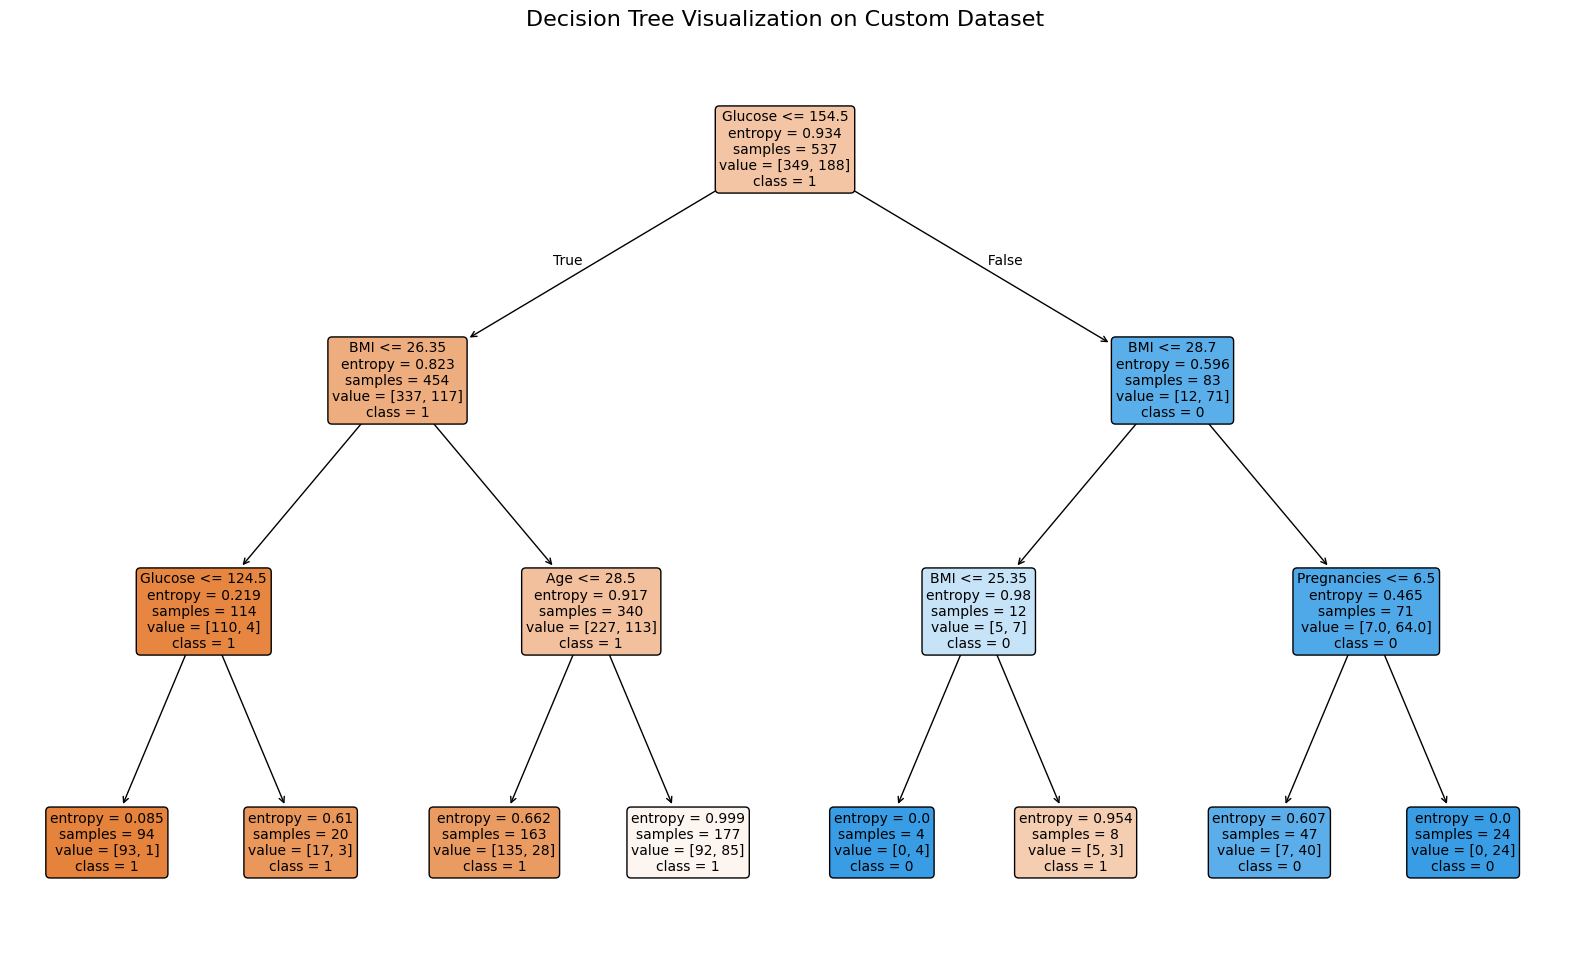

In [16]:
plt.figure(figsize=(20, 12))  # Wider for better readability

plot_tree(
    model,
    feature_names=X.columns,      # Uses ALL column names dynamically
    class_names=[str(cls) for cls in y.unique()],  # Uses Outcome classes dynamically
    filled=True,
    rounded=True,                 # Rounded boxes for neatness
    fontsize=10                   # Slightly smaller font if many features
)

plt.title("Decision Tree Visualization on Custom Dataset", fontsize=16)
plt.show()